# Dataset: *prince-toronto*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\prince-toronto-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\prince-toronto-src.csv',index=False)

In [15]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud,ImageColorGenerator
# import nltk
# from nltk import FreqDist, word_tokenize

In [16]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\prince-toronto-df-2.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_reply_tw', 'reply_sentiment', 'reply_emo_ro'],
      dtype='object')
(623, 12)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro
0,529590949136326656,842564341,"As an aside, Toronto is home to @magpietoronto...",Tue Nov 04 11:08:16 +0000 2014,5.295916e+17,1.538385e+09,"@PrinceMuseum @magpietoronto @3RDEYEGIRL Lol, ...",Tue Nov 04 11:11:03 +0000 2014,0,lol hopefully stock summer range pop australia,Positive,joy


In [17]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\prince-toronto-src-2.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'src_emo_ro'],
      dtype='object')
(233, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,src_emo_ro
0,529590949136326656,842564341,"As an aside, Toronto is home to @magpietoronto...",Tue Nov 04 11:08:16 +0000 2014,0,aside toronto home prince get lot stage clothe,Neutral,joy


In [ ]:
src_tw_df.loc[src_tw_df.cleaned_src_tw.isnull(),['src_tweet_id','src_tweet','cleaned_src_tw','src_sentiment']]

In [18]:
df1 = pd.merge(df, src_tw_df[['src_tweet_id','cleaned_src_tw','src_sentiment','src_emo_ro']],\
               on='src_tweet_id')
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro,cleaned_src_tw,src_sentiment,src_emo_ro
0,529590949136326656,842564341,"As an aside, Toronto is home to @magpietoronto...",Tue Nov 04 11:08:16 +0000 2014,5.295916e+17,1.538385e+09,"@PrinceMuseum @magpietoronto @3RDEYEGIRL Lol, ...",Tue Nov 04 11:11:03 +0000 2014,0,lol hopefully stock summer range pop australia,Positive,joy,aside toronto home prince get lot stage clothe,Neutral,joy


In [19]:
print("df's shape: ",df.shape)
print("df1's shape: ",df1.shape)
print("src_tw_df's shapes: ", src_tw_df.shape)

df's shape:  (623, 12)
df1's shape:  (623, 15)
src_tw_df's shapes:  (233, 8)


In [ ]:
src_null = df1.loc[df1.cleaned_src_tw.isnull()].index

In [ ]:
#df1.drop(src_null,0).shape

## Sentiment Analysis

In [22]:
src_tw_df.label.value_counts()

1    229
0      4
Name: label, dtype: int64

### Source Tweets 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


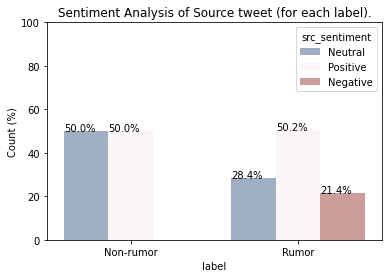

In [20]:
g = src_tw_df.groupby(['label'])['src_sentiment'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='src_sentiment',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')
g.axes.set_title('Sentiment Analysis of Source Tweet (for each label)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('Sentiment Analysis of Source tweet (for each label).',fontsize=12)
plt.savefig('D:/論文/PHEME9/Code/graph/prince-toronto/src-sentiment.pdf',dpi=300)

In [ ]:
g = src_tw_df.groupby(['src_sentiment'])['label'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='src_sentiment',y='count',hue='label',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('# of rumor/non-rumor Source tweet (for each sentiment class).',fontsize=12)


### Reply Tweets

In [ ]:
df.reply_sentiment.value_counts(normalize=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


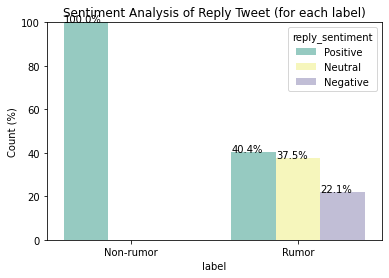

In [23]:
g = df.groupby(['label'])['reply_sentiment'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='reply_sentiment',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_title('Sentiment Analysis of Reply Tweet (for each label)')
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.savefig('D:/論文/PHEME9/Code/graph/prince-toronto/reply-sentiment.pdf',dpi=300)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


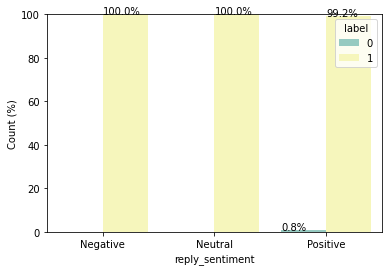

In [24]:
g = df.groupby(['reply_sentiment'])['label'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='reply_sentiment',y='count',hue='label',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)

## Emotion Analysis

### Source Tweets

In [ ]:
src_tw_df['src_emo_ro'].value_counts(normalize=True)

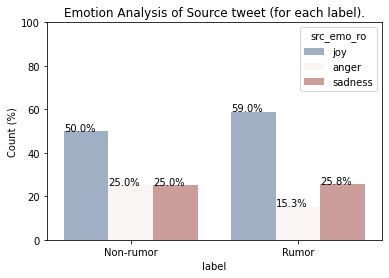

In [25]:
g = src_tw_df.groupby(['label'])['src_emo_ro'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='src_emo_ro',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('Emotion Analysis of Source tweet (for each label).',fontsize=12)
plt.savefig('D:/論文/PHEME9/Code/graph/prince-toronto/src-emotion.pdf',dpi=300)

### Reply Tweets

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


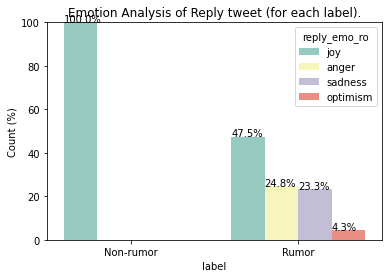

In [26]:
g =df.groupby(['label'])['reply_emo_ro'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='reply_emo_ro',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('Emotion Analysis of Reply tweet (for each label).',fontsize=12)
plt.savefig('D:/論文/PHEME9/Code/graph/prince-toronto/reply-emotion.pdf',dpi=300)